In [ ]:
import numpy as np
import pandas as pd
import seaborn
from sklearn.preprocessing import PowerTransformer

In [ ]:
data = pd.read_csv("pain_db.csv")

In [ ]:
columns = ['CH22_Sim-corr', 'CH22_S-sd','CH23_A-PEAK','CH23_Sim-corr','CH23_Sim-MutInfo',
           'CH24_Sim-corr','CH22_A-RMS','CH22_L-ldf','CH22_V-var','CH24_Sim-MutInfo',
           'CH25_meanRR','CH25_rmssd','CH25_slopeRR','CH26_A-PEAK','CH26_Sim-corr',
           'CH26_Sim-MutInfo']

X = pd.DataFrame(data, columns=columns)
Y = pd.DataFrame(data, columns=['Label'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f578b3ad510>,
      dtype=object)

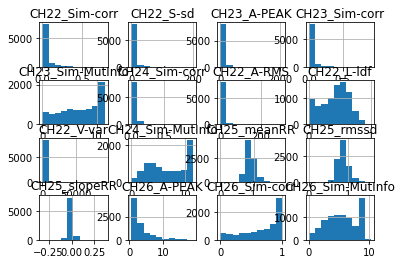

In [ ]:
X.hist()

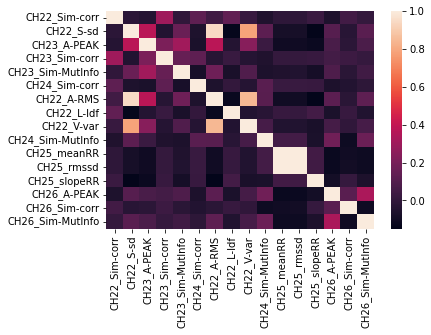

In [ ]:
seaborn.heatmap(X.corr())

In [ ]:
X = ((X - X.mean()) / X.std())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f578aab3e10>,
      dtype=object)

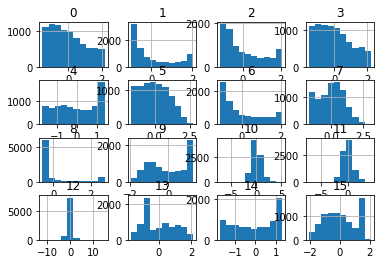

In [ ]:
transformer = PowerTransformer(method='yeo-johnson').fit(X).transform(X)
pd.DataFrame(transformer).hist()

In [ ]:
label_mapping = {"level_zero": 0, "level_one": 1, "level_two": 2, "level_three": 3, "level_four": 4}
Y = Y.replace({"Label": label_mapping})
Y.head()

,Label
0,1
1,0
2,2
3,1
4,0


### XGBoost

In [ ]:
import numpy as np
import pandas as pd
import seaborn
from sklearn.preprocessing import PowerTransformer

In [ ]:
data = pd.read_csv("pain_db.csv")

In [ ]:
# columns = ['CH22_Sim-corr', 'CH22_S-sd','CH23_A-PEAK','CH23_Sim-corr','CH23_Sim-MutInfo',
#            'CH24_Sim-corr','CH22_A-RMS','CH22_L-ldf','CH22_V-var','CH24_Sim-MutInfo',
#            'CH25_meanRR','CH25_rmssd','CH25_slopeRR','CH26_A-PEAK','CH26_Sim-corr',
#            'CH26_Sim-MutInfo']

# X = pd.DataFrame(data, columns=columns)
# Y = pd.DataFrame(data, columns=['Label'])

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Y_train.squeeze().shape

In [ ]:
X = data.iloc[:,2:]
Y = pd.DataFrame(data.iloc[:,1])
X.shape, Y.shape

((8500, 151), (8500, 1))

In [ ]:
label_mapping = {"level_zero": 0, "level_one": 1, "level_two": 2, "level_three": 3, "level_four": 4}
Y = Y.replace({"Label": label_mapping})
Y.head()

,Label
0,1
1,0
2,2
3,1
4,0


In [ ]:

X.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
X.dropna(inplace=True)
X.shape

(8427, 151)

In [ ]:
X = X.sample(n=50,axis='columns')
X.shape, X.columns

((8427, 50), Index(['CH24_A-MAVFDN', 'CH26_A-MAV', 'CH23_S-me', 'CH24_A-MAVSD',
        'CH26_L-pldf', 'CH23_A-PEAK', 'CH24_L-pldf', 'CH25_rmssd',
        'CH26_S-areapond', 'CH24_V-intrange', 'CH23_A-MAVFDN', 'CH23_V-std',
        'CH24_E-Fuzzy', 'CH24_L-ldf', 'CH26_V-intrange', 'CH22_V-std',
        'CH24_F-fmean', 'CH23_A-MAV', 'CH22_V-range', 'CH23_S-median',
        'CH22_S-me', 'CH26_A-MAVSDN', 'CH26_Sim-MutInfo', 'CH24_S-area',
        'CH23_E-Shannon', 'CH24_F-bw', 'CH24_A-MAVFD', 'CH24_S-median',
        'CH26_Sim-cohe_F_median', 'CH24_V-range', 'CH22_F-cf', 'CH24_V-var',
        'CH24_A-MINLocMinV', 'CH26_E-Aprox', 'CH24_A-MAVSDN',
        'CH22_Sim-MutInfo', 'CH26_E-Shannon', 'CH23_A-P2P', 'CH23_S-sd',
        'CH22_V-intrange', 'CH23_V-var', 'CH23_L-pldf', 'CH26_A-MAVFDN',
        'CH23_Sim-MutInfo', 'CH24_A-P2P', 'CH26_E-Fuzzy',
        'CH22_Sim-cohe_F_median', 'CH24_S-freqpond', 'CH22_S-areapond',
        'CH26_S-sd'],
       dtype='object'))

In [ ]:
X_train = X.iloc[:6500,:]
Y_train = Y.iloc[:6500,:]
X_test = X.iloc[6500:,:]
Y_test = Y.iloc[6500:,:]

In [ ]:
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

clf = make_pipeline(StandardScaler(),
                    PowerTransformer(method="yeo-johnson"),
                    PolynomialFeatures(degree=3), 
                    xgb.XGBClassifier(objective ='multi:softmax',
                                      max_depth=10, n_estimators=150),
                    verbose=True)

clf.fit(X_train, Y_train.squeeze())

[Pipeline] .... (step 1 of 4) Processing standardscaler, total=   0.0s
[Pipeline] .. (step 2 of 4) Processing powertransformer, total=   0.7s
[Pipeline]  (step 3 of 4) Processing polynomialfeatures, total=   0.7s


In [ ]:
clf.score(X_test, Y_test.squeeze())

0.4054901960784314

In [ ]:
import pickle
file_name = "xgb_model.pkl"

# save
pickle.dump(clf, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

### CatBoost

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [11]:
import numpy as np
import pandas as pd
import seaborn
from sklearn.preprocessing import PowerTransformer

In [12]:
data = pd.read_csv("pain_db.csv")

In [13]:
label_mapping = {"level_zero": 0, "level_one": 1, "level_two": 2, "level_three": 3, "level_four": 4}
data = data.replace({"Label": label_mapping})

data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data.dropna(inplace=True)


In [14]:
X = data.iloc[:,2:]
Y = pd.DataFrame(data.iloc[:,1])
X.shape, Y.shape

((8427, 151), (8427, 1))

In [15]:
X_train = X.iloc[:6500,:]
Y_train = Y.iloc[:6500,:]
X_test = X.iloc[6500:,:]
Y_test = Y.iloc[6500:,:]

In [23]:
class AccuracyMetric(object):
    def get_final_error(self, error, weight):
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        return True

    def evaluate(self, approxes, target, weight):
        best_class = np.argmax(approxes, axis=0)

        accuracy_sum = 0
        weight_sum = 0

        for i in range(len(target)):
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            accuracy_sum += w * (best_class[i] == target[i])

        return accuracy_sum, weight_sum

In [26]:
from catboost import Pool, CatBoostClassifier

cat_features = [0]



train_dataset = Pool(data=X_train,
                     label=Y_train)

eval_dataset = Pool(data=X_test,
                    label=Y_test)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=4,
                           eval_metric=AccuracyMetric())

model.fit(train_dataset)
# Get predicted classes
preds_class = model.predict(eval_dataset)
preds_class[:20]

/usr/local/lib/python3.7/dist-packages/catboost/core.py:1705: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<function argmax at 0x7f0106c5d200>) found for signature:
 
 >>> argmax(UniTuple(array(float64, 1d, C) x 5), axis=Literal[int](0))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload in function 'Numpy_method_redirection.generic': File: numba/core/typing/npydecl.py: Line 348.
        With argument(s): '(UniTuple(array(float64, 1d, C) x 5), axis=Literal[int](0))':
       Rejected as the implementation raised a specific error:
         TypingError: numba doesn't support kwarg for argmax
  raised from /usr/local/lib/python3.7/dist-packages/numba/core/typing/npydecl.py:370

During: resolving callee type: Function(<function argmax at 0x7f0106c5d200>)
During: typing of call at <ipython-input-23-8df5f6963479> (9)


File 

0:	learn: 0.3676923	total: 161ms	remaining: 2m 40s
1:	learn: 0.3761538	total: 243ms	remaining: 2m 1s
2:	learn: 0.3881538	total: 328ms	remaining: 1m 49s
3:	learn: 0.3923077	total: 418ms	remaining: 1m 43s
4:	learn: 0.3909231	total: 506ms	remaining: 1m 40s
5:	learn: 0.3920000	total: 577ms	remaining: 1m 35s
6:	learn: 0.3932308	total: 669ms	remaining: 1m 34s
7:	learn: 0.3947692	total: 750ms	remaining: 1m 32s
8:	learn: 0.3955385	total: 842ms	remaining: 1m 32s
9:	learn: 0.3963077	total: 921ms	remaining: 1m 31s
10:	learn: 0.3986154	total: 995ms	remaining: 1m 29s
11:	learn: 0.3950769	total: 1.08s	remaining: 1m 29s
12:	learn: 0.4001538	total: 1.17s	remaining: 1m 29s
13:	learn: 0.4021538	total: 1.26s	remaining: 1m 28s
14:	learn: 0.3990769	total: 1.34s	remaining: 1m 27s
15:	learn: 0.4020000	total: 1.42s	remaining: 1m 27s
16:	learn: 0.4015385	total: 1.5s	remaining: 1m 26s
17:	learn: 0.4026154	total: 1.59s	remaining: 1m 26s
18:	learn: 0.4055385	total: 1.68s	remaining: 1m 26s
19:	learn: 0.4067692	tot

array([[3],
       [2],
       [1],
       [3],
       [3],
       [4],
       [3],
       [1],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [4],
       [4],
       [3],
       [3],
       [3]])

In [27]:
print(model.get_best_score())

{'learn': {'AccuracyMetric': 0.8706153846153846, 'MultiClass': 0.7392851917086027}}


In [28]:
import pickle
file_name = "catboost_model.pkl"

# save
pickle.dump(model, open(file_name, "wb"))